<a href="https://colab.research.google.com/github/Sanit22/ecom_model/blob/main/Ecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/content/train_data_v2.csv')
df_test = pd.read_csv('/content/test_data_v2.csv')
df_train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [112]:
y = df_train['Made_Purchase'].copy()
X = df_train.drop('Made_Purchase', axis=1)

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

### Distribution of data in each column

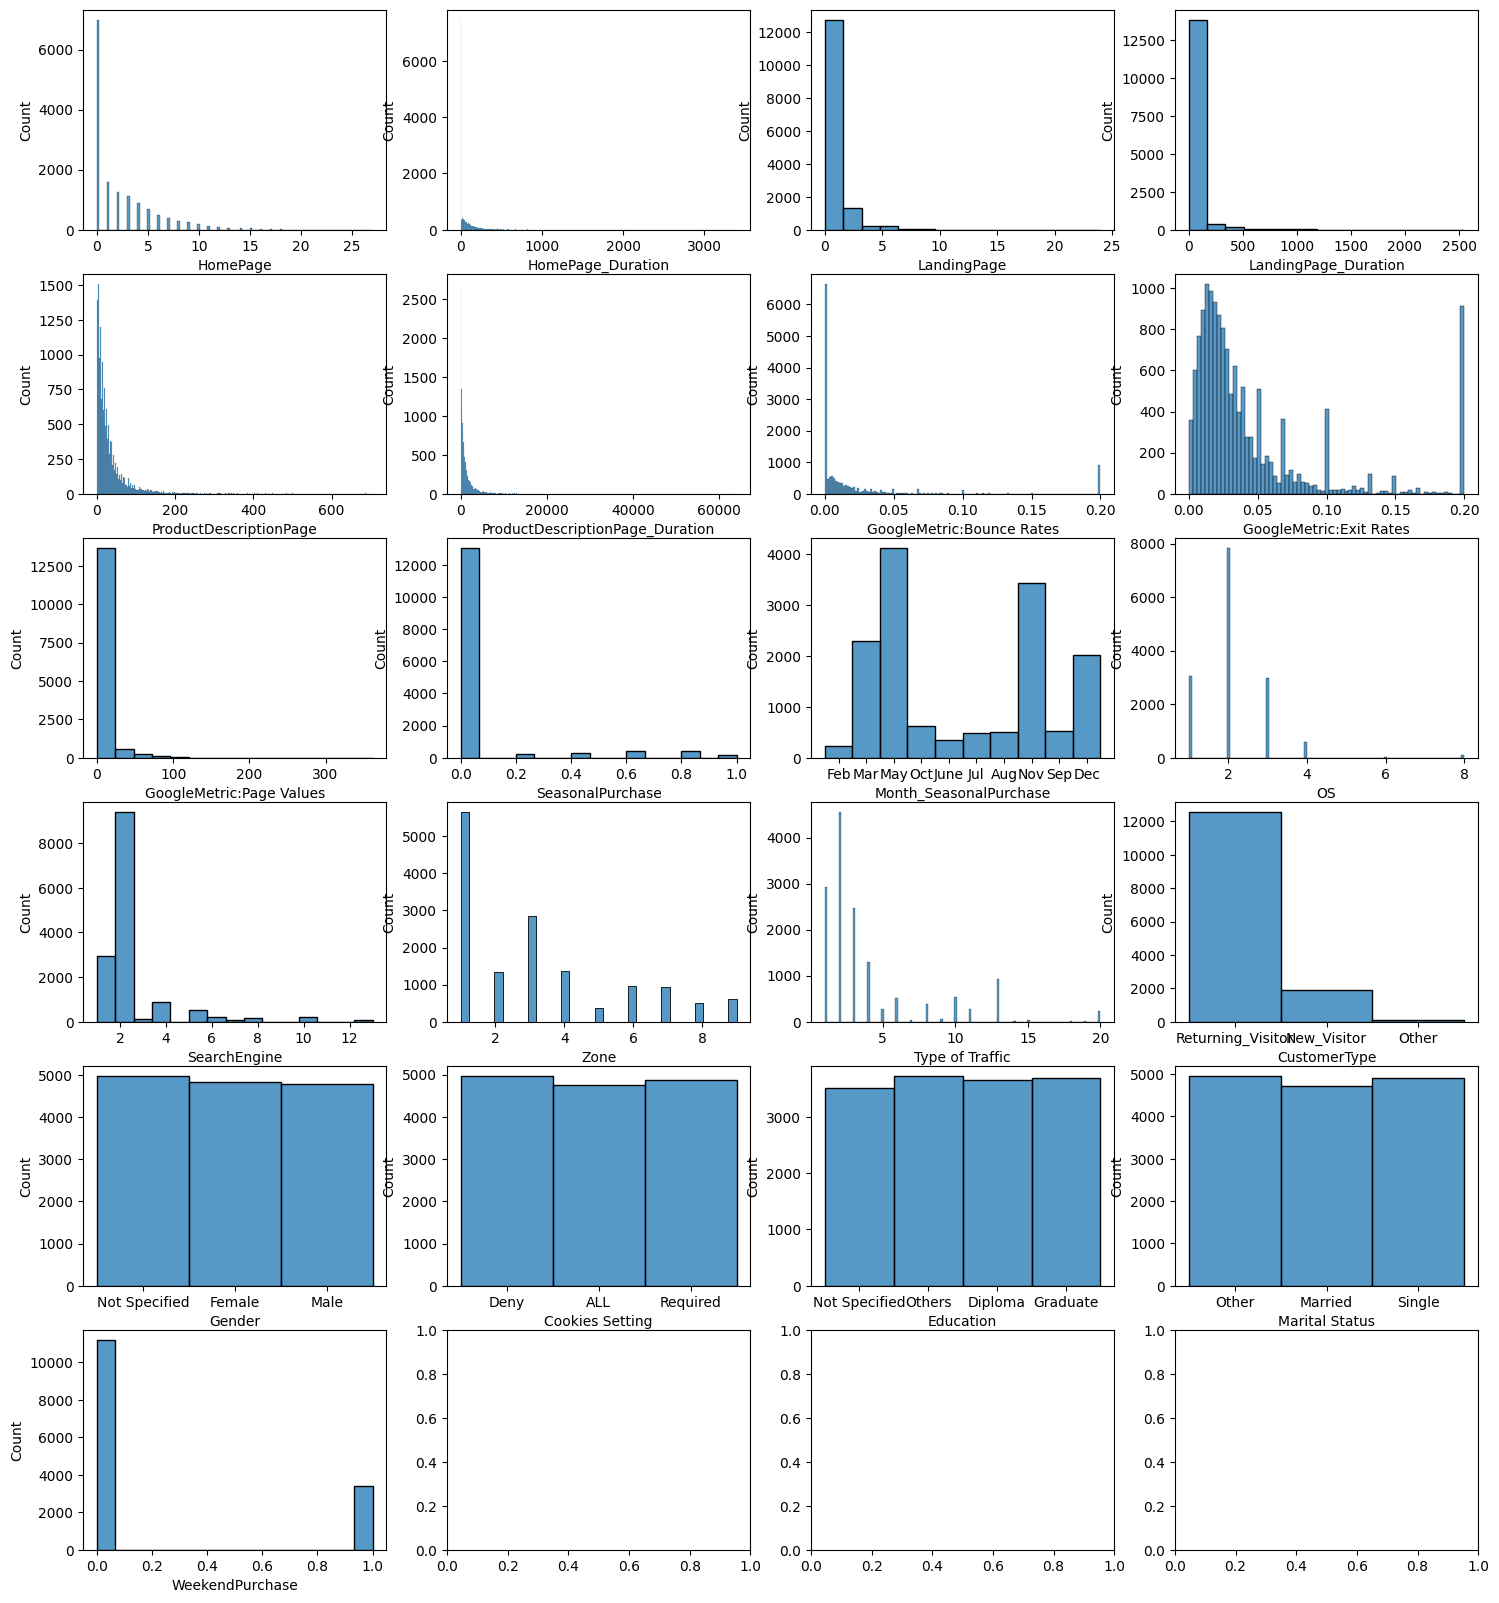

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(18, 20))

axs = axs.flatten()

for i, col in enumerate(X.columns):
  sns.histplot(X[col], ax=axs[i])
  # if(X[col].dtype == 'float64'):
    
  # else:

  #   sns.boxplot(X[col], ax=axs[i])
  #   axs[i].set_title(col)
    
plt.show()

  

### Rectifying datatypes of certain columns

In [115]:
# OS, SearchEngine, Zone, Type of traffic should be categorical not float, weekend purchase should be boolean not float
X['OS'] = X['OS'].astype('object')
X['SearchEngine'] = X['SearchEngine'].astype('object')
X['Zone'] = X['Zone'].astype('object')
X['Type of Traffic'] = X['Type of Traffic'].astype('object')
X['Zone'] = X['Zone'].astype('object')
X['WeekendPurchase'] = X['WeekendPurchase'].astype('bool')


df_test['OS'] = df_test['OS'].astype('object')
df_test['SearchEngine'] = df_test['SearchEngine'].astype('object')
df_test['Zone'] = df_test['Zone'].astype('object')
df_test['Type of Traffic'] = df_test['Type of Traffic'].astype('object')
df_test['Zone'] = df_test['Zone'].astype('object')
df_test['WeekendPurchase'] = df_test['WeekendPurchase'].astype('bool')

In [116]:
X.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### In several columns, there is noticeable difference between the 75% percentile and the maximum value. This indicates presence of outliers in our dataset. Let us examine the outliers for each numerical column through boxplots.

## Outlier analysis

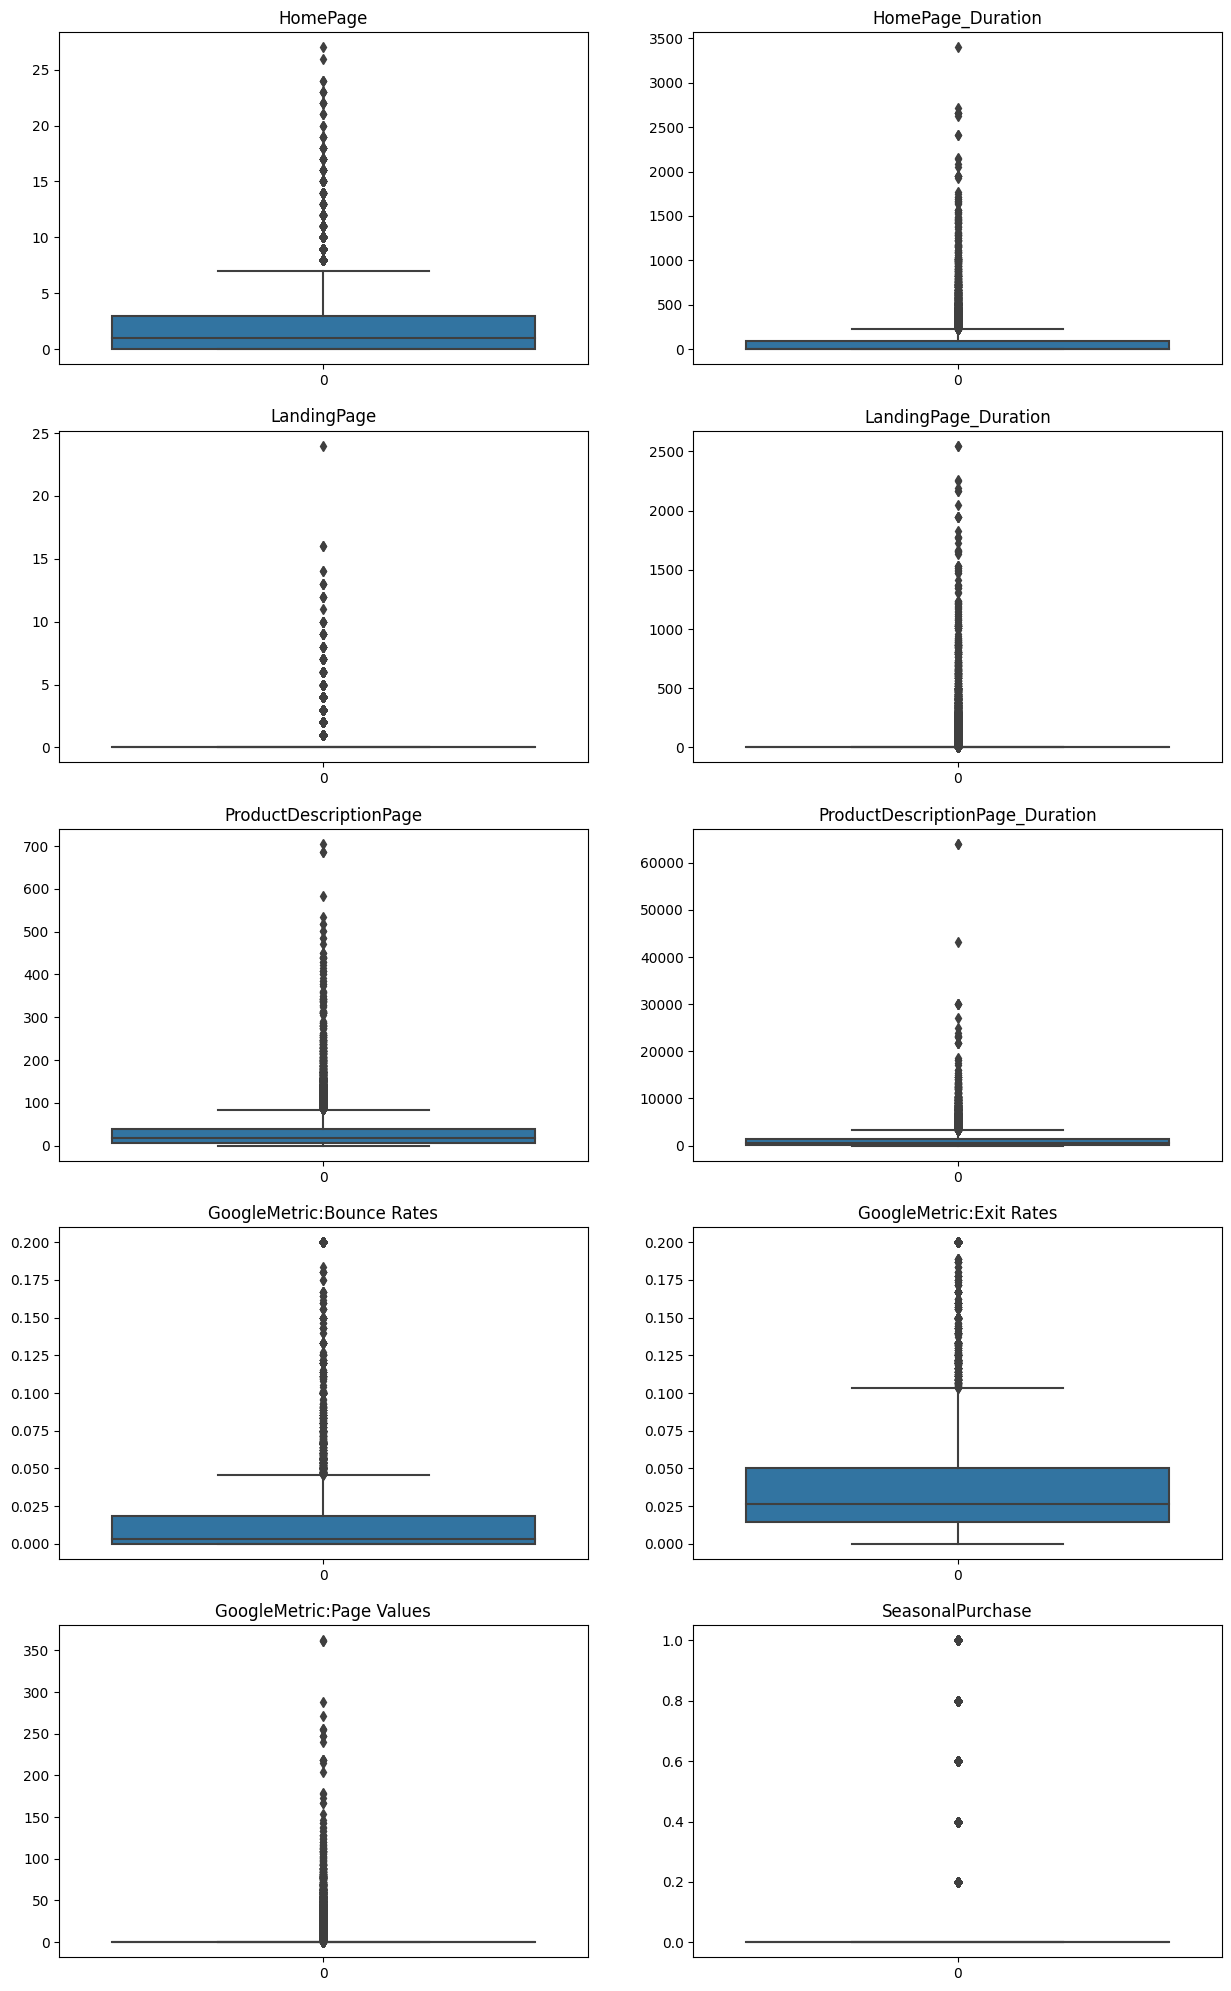

In [117]:
num_cols = [col for col in X.columns if X[col].dtype == 'float64']

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(X[col], ax=axs[i])
    axs[i].set_title(col)
    
plt.show()

### We see a lot of points lie above the upper quartile. If we remove all of them, there would be loss of data which we do not want. 

### Check for duplicate rows in our dataset

In [118]:
X[X.duplicated()]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
2937,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,3.0,Returning_Visitor,Male,Deny,Others,Other,False
8647,0.0,0.000000,0.0,0.0,12.0,166.000000,0.028571,0.071429,0.0,0.0,...,2.0,2.0,1.0,1.0,Returning_Visitor,Not Specified,Required,Diploma,Single,True
8705,0.0,0.000000,0.0,0.0,37.0,1048.980263,0.005556,0.024074,0.0,0.0,...,2.0,2.0,7.0,2.0,Returning_Visitor,Not Specified,Deny,Others,Single,True
8820,2.0,38.000000,0.0,0.0,21.0,733.700000,0.000000,0.014035,0.0,0.0,...,2.0,7.0,1.0,3.0,Returning_Visitor,Male,Deny,Not Specified,Married,True
9076,0.0,0.000000,0.0,0.0,33.0,629.858333,0.006061,0.030303,0.0,0.0,...,2.0,2.0,3.0,1.0,Returning_Visitor,Female,Deny,Graduate,Married,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,0.0,0.000000,0.0,0.0,4.0,69.000000,0.000000,0.050000,0.0,0.0,...,1.0,1.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Others,Other,False
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,3.0,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,False
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,False
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,False


### A lot of rows have the same features but different labels. We need to deal with that because it will make it difficult for algorithms to predict accurately.

### Approach 1: Mark all duplicates as True, so all the wrongly marked False will be set to True, and after that we can remove the duplicates.

In [119]:
dup_indices = X[X.duplicated(keep=False)].index

In [120]:
# y[dup_indices] = True

## Approach 2: Mark all as False

In [121]:
y[dup_indices] = False

In [122]:
X[X.duplicated(keep=False)]

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,True
5,0.0,0.000000,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,2.0,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,False
6,0.0,0.000000,0.0,0.0,3.0,395.000000,0.000000,0.066667,0.0,0.0,...,1.0,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,False
8,0.0,0.000000,0.0,0.0,6.0,98.000000,0.000000,0.066667,0.0,0.0,...,2.0,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,False
12,0.0,0.000000,0.0,0.0,13.0,334.966667,0.000000,0.007692,0.0,0.0,...,1.0,1.0,1.0,4.0,Returning_Visitor,Male,Required,Diploma,Single,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,0.0,0.000000,0.0,0.0,4.0,69.000000,0.000000,0.050000,0.0,0.0,...,1.0,1.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Others,Other,False
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,3.0,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,False
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,False
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,False


## Remove duplicates

In [123]:
rem_dups = X[X.duplicated()].index
X.drop(index = rem_dups, inplace=True)
y.drop(index = rem_dups, inplace=True)

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11925 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         11805 non-null  float64
 1   HomePage_Duration                11802 non-null  float64
 2   LandingPage                      11808 non-null  float64
 3   LandingPage_Duration             11813 non-null  float64
 4   ProductDescriptionPage           11826 non-null  float64
 5   ProductDescriptionPage_Duration  11789 non-null  float64
 6   GoogleMetric:Bounce Rates        11803 non-null  float64
 7   GoogleMetric:Exit Rates          11819 non-null  float64
 8   GoogleMetric:Page Values         11819 non-null  float64
 9   SeasonalPurchase                 11807 non-null  float64
 10  Month_SeasonalPurchase           11811 non-null  object 
 11  OS                               11813 non-null  object 
 12  SearchEngine      

In [125]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

## Correlation analysis

<ipython-input-126-18e2220ea55f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_comb.corr()


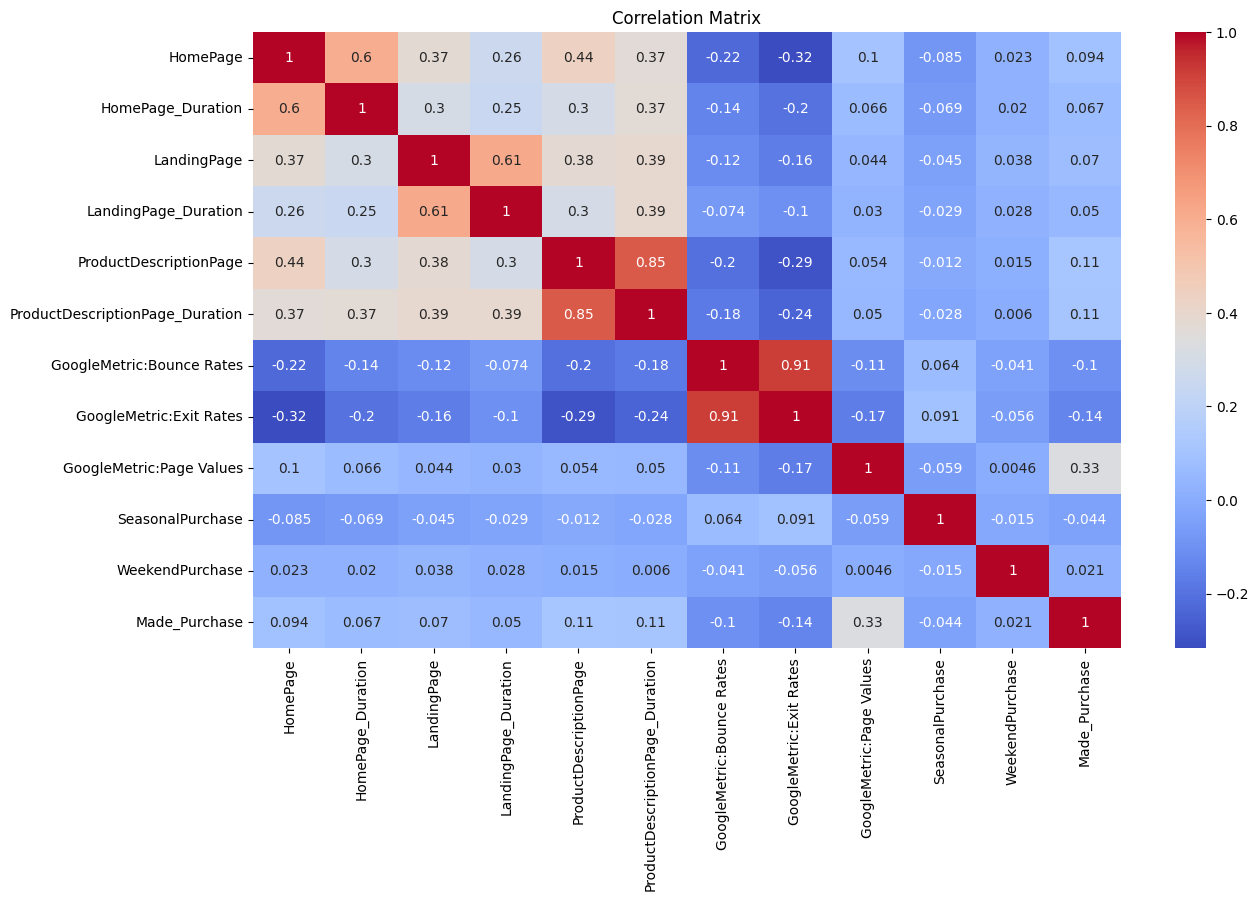

In [126]:
#correlation matrix
df_comb = pd.concat((X, y), axis=1)
corr_matrix = df_comb.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [127]:
float_cols = [col for col in X.columns if X[col].dtype == 'float64']
cat_cols = [col for col in X.columns if col not in float_cols]

## Split to train and test

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True)

# Pre-processing

In [129]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler


num_pipeline = Pipeline([
    ('knn', KNNImputer(n_neighbors=2)),
    ('scaler', RobustScaler())
])

cat_pipeline = Pipeline([
    ('sm', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

pipe = ColumnTransformer([
    ('np', num_pipeline, float_cols),
    ('cp', cat_pipeline, cat_cols)
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
df_test = pipe.transform(df_test)






## Distribution of labels

In [130]:
y_test.value_counts()

False    2265
True      717
Name: Made_Purchase, dtype: int64

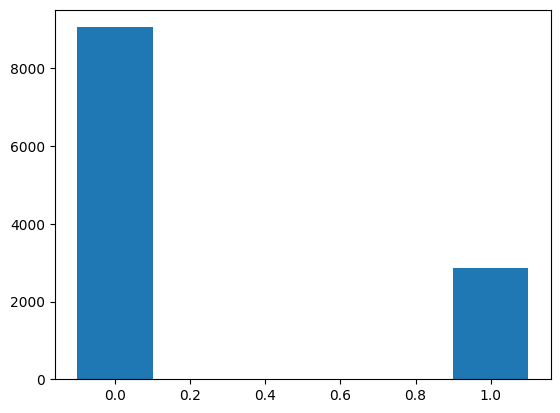

In [131]:
plt.bar(x = [False, True], height = [y.value_counts()[False], y.value_counts()[True]], width=0.2)
plt.show()

### Mark true as 1 and false as 0

In [132]:
y_train[y_train == True] = 1
y_train[y_train == False] = 0
y_train = y_train.astype('int')

y_test[y_test == True] = 1
y_test[y_test == False] = 0
y_test = y_test.astype('int')

# Model

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

## Some common functions for training and evaluating models

In [134]:
def train_classifier(X_train, y_train, estimator):
  scores = cross_val_score(estimator=estimator, X=X_train, y=y_train, cv=5, scoring='f1')
  print(f"Training score without hyperparameter tuning based on f1 score is {scores.mean()}")

def RandomizedSearch(X_train, y_train, param_grid, estimator):
  rs = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, cv=3, scoring='f1', random_state=42)
  scores = rs.fit(X_train, y_train)
  print(f"Best params are {scores.best_params_}. Best score is {scores.best_score_}")

def GridSearch(X_train, y_train, param_grid, estimator):
  gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=3)
  scores = gs.fit(X_train, y_train)
  print(f"Best params are {scores.best_params_}. Best score is {scores.best_score_}")

def evaluation(est, X_train, y_train, X_test, y_test):
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot()
  plt.show()

In [135]:
X_train.shape

(8943, 88)

In [108]:
p

NameError: ignored

## Logistic regression

In [100]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler

pipe = Pipeline([
    ('feature_selection', SelectKBest()),
    ('log_reg', LogisticRegression(random_state=42, class_weight='balanced', max_iter=500))
])
# X_new = SelectKBest(k=20).fit_transform(X, y)
# lg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

param_grid = {
    'feature_selection__k': [40, 50, 60, 70, 80],
}

GridSearch(X_train, y_train, param_grid, pipe)
# lg.fit(X_train, y_train)
# y_pred = lg.predict(X_test)
# f1_score(y_test, y_pred) 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs 

Best params are {'feature_selection__k': 80}. Best score is 0.5001903793663633


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lb

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2265
           1       0.45      0.55      0.49       717

    accuracy                           0.73      2982
   macro avg       0.65      0.67      0.65      2982
weighted avg       0.75      0.73      0.74      2982



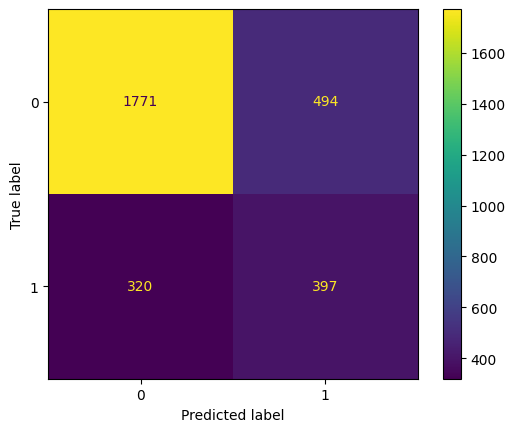

In [136]:
X_train_new = SelectKBest(k=80).fit_transform(X_train, y_train)
X_test_new = SelectKBest(k=80).fit_transform(X_test, y_test)
lg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lg.fit(X_train_new, y_train)
y_pred = lg.predict(X_test_new)
evaluation(lg, X_train_new, y_train, X_test_new, y_test)

In [155]:
probs = lg.predict_proba(X_test_new)

In [158]:
y_pred = []
for prob in probs:
  if(prob[0] > 0.7):
    y_pred.append(1)
  else:
    y_pred.append(0)
y_pred = np.array(y_pred)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2265
           1       0.45      0.55      0.49       717

    accuracy                           0.73      2982
   macro avg       0.65      0.67      0.65      2982
weighted avg       0.75      0.73      0.74      2982



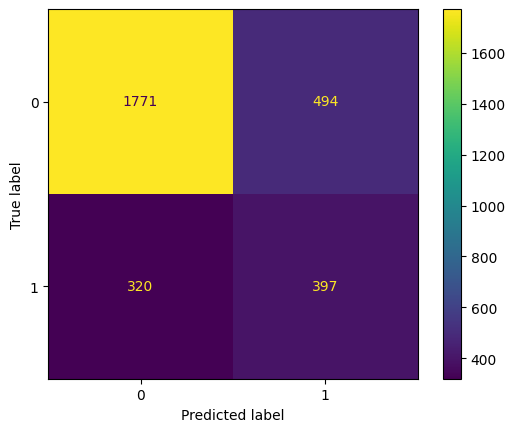

In [159]:
evaluation(lg, X_train_new, y_train, X_test_new, y_test)

## DecisionTreeClassifier

0.7142857142857143
Training score without hyperparameter tuning based on f1 score is 0.4511650533198754
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2265
           1       0.41      0.44      0.43       717

    accuracy                           0.71      2982
   macro avg       0.62      0.62      0.62      2982
weighted avg       0.72      0.71      0.72      2982



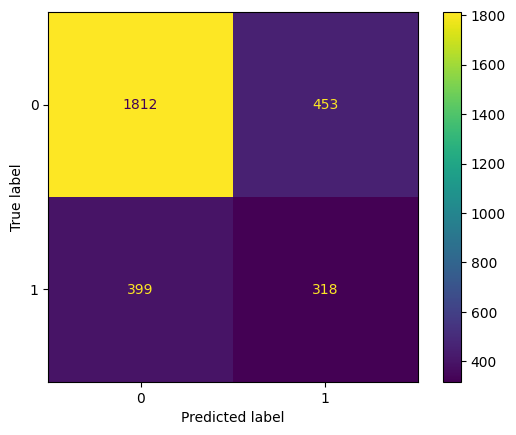

In [137]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24, class_weight='balanced')
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
train_classifier(X_train, y_train, dt)
evaluation(dt, X_train, y_train, X_test, y_test)

## BaggingClassifier

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2265
           1       0.68      0.33      0.44       717

    accuracy                           0.80      2982
   macro avg       0.75      0.64      0.66      2982
weighted avg       0.79      0.80      0.78      2982



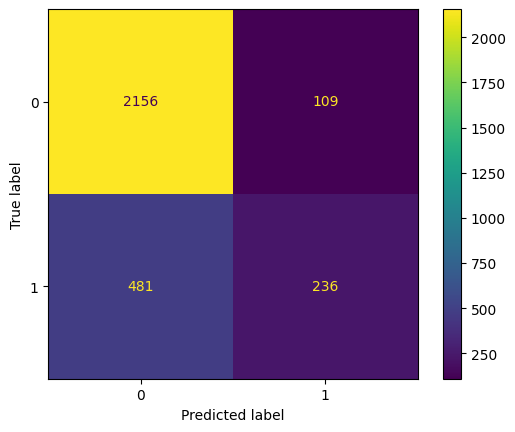

In [138]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=42, bootstrap_features=True)
bc.fit(X_train, y_train)

evaluation(bc, X_train, y_train, X_test, y_test)

In [ ]:
# param_grid = {
#     'n_estimators': [100, 150],
#     'max_samples': [0.5, 0.7],
#     'max_features': [0.5, 0.7]
# }
# GridSearch(X_train, y_train, param_grid, bc)
#Best params are {'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 100}. Best score is 0.5793383383591503

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2265
           1       0.78      0.27      0.40       717

    accuracy                           0.81      2982
   macro avg       0.79      0.62      0.64      2982
weighted avg       0.80      0.81      0.77      2982



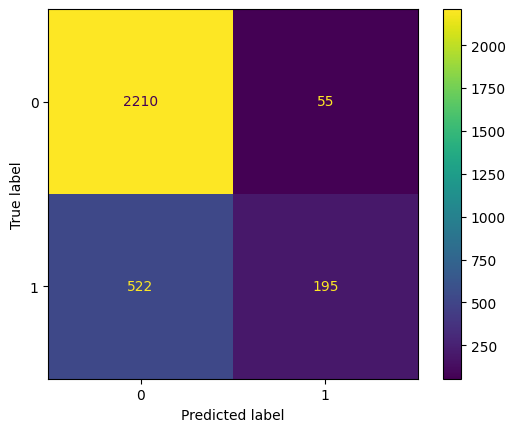

In [139]:
bc_tuned = BaggingClassifier(random_state=42, max_features = 0.5, max_samples = 0.5, n_estimators = 150)
bc_tuned.fit(X_train, y_train)
evaluation(bc_tuned, X_train, y_train, X_test, y_test)

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2265
           1       0.68      0.37      0.48       717

    accuracy                           0.81      2982
   macro avg       0.75      0.66      0.68      2982
weighted avg       0.79      0.81      0.78      2982



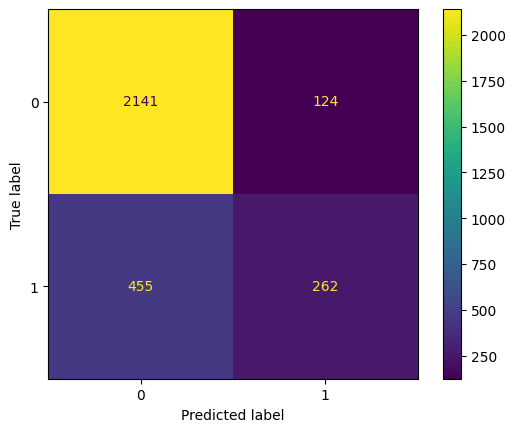

In [140]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)
evaluation(rfc, X_train, y_train, X_test, y_test)

In [151]:
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [2, 6, 8],
    'min_samples_split': [0.5, 0.7],
    'max_features': [0.5, 0.8],
    'ccp_alpha': [0, 0.5, 2]
}
GridSearch(X_train, y_train, param_grid, rfc)
#Best params are {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 0.5, 'n_estimators': 150}. Best score is 0.5999293281194197

Best params are {'ccp_alpha': 0, 'max_depth': 2, 'max_features': 0.8, 'min_samples_split': 0.5, 'n_estimators': 150}. Best score is 0.5420980142860515


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2265
           1       0.58      0.51      0.54       717

    accuracy                           0.79      2982
   macro avg       0.71      0.70      0.71      2982
weighted avg       0.79      0.79      0.79      2982



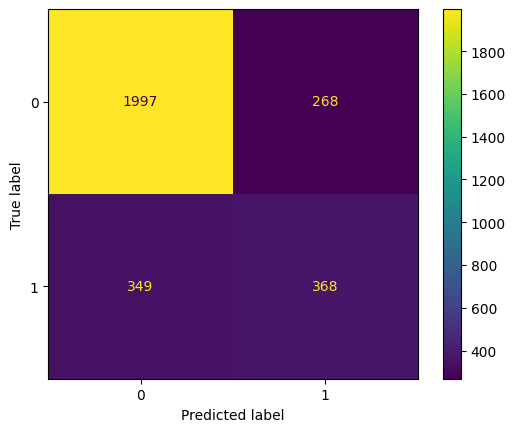

In [152]:
rfc_tuned = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth= 2, max_features= 0.8, min_samples_leaf= 1, min_samples_split= 0.5, n_estimators= 150
)
rfc_tuned.fit(X_train, y_train)
evaluation(rfc_tuned, X_train, y_train, X_test, y_test)

In [146]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, hidden_layer_sizes = (150,), max_iter=500)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)


0.761569416498994

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      2265
           1       0.51      0.41      0.45       717

    accuracy                           0.76      2982
   macro avg       0.66      0.64      0.65      2982
weighted avg       0.75      0.76      0.75      2982



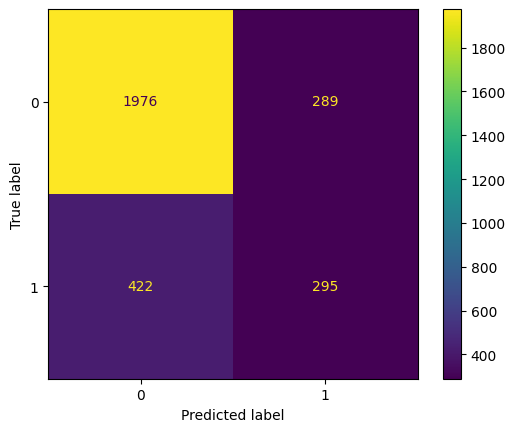

In [147]:
y_pred = mlp.predict(X_test)
evaluation(mlp, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [
     ('rfc', RandomForestClassifier(random_state=42, class_weight='balanced_subsample', max_depth= 6, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 0.5, n_estimators= 200)),
     ('svr', LinearSVC(random_state=42)),
     ('adb', AdaBoostClassifier(random_state=42)),
     ('bc', BaggingClassifier(random_state=42, bootstrap_features=True)),
     ('xgb', XGBClassifier(objective='binary:logistic'))
     ]
    
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )

clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(class_weight='balanced_subsample',
                                                       max_depth=6,
                                                       max_features=0.5,
                                                       min_samples_split=0.5,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('svr', LinearSVC(random_state=42)),
                               ('adb', AdaBoostClassifier(random_state=42)),
                               ('bc',
                                BaggingClassifier(bootstrap_features=True,
                                                  random_state=42)),
                               ('xgb',
                                XGBClassifier(bas...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      2266
           1       0.61      0.39      0.47      1417

    accuracy                           0.67      3683
   macro avg       0.65      0.62      0.62      3683
weighted avg       0.66      0.67      0.65      3683



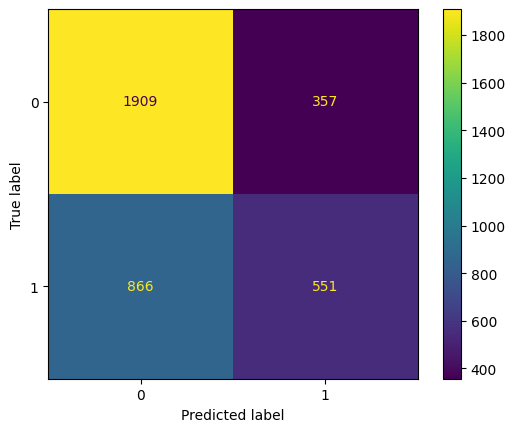

In [ ]:
y_pred = clf.predict(X_test)
evaluation(clf, X_train, y_train, X_test, y_test)

## AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2265
           1       0.62      0.38      0.47       717

    accuracy                           0.80      2982
   macro avg       0.72      0.65      0.67      2982
weighted avg       0.78      0.80      0.78      2982



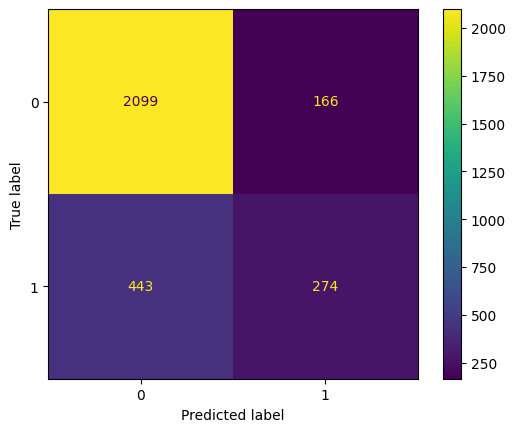

In [148]:
from sklearn.ensemble import AdaBoostClassifier

# base_est = DecisionTreeClassifier(random_state=24, class_weight='balanced',  min_samples_split=0.9, min_samples_leaf=0.05, max_features=0.5, max_depth=8)
adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train, y_train)
evaluation(adb, X_train, y_train, X_test, y_test)

In [ ]:
train_classifier(X_train, y_train, adb)

Training score without hyperparameter tuning based on f1 score is 0.3921277364276105


In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.1, 0.5, 1, 2, 4],
# }

# GridSearch(X_train, y_train, param_grid, adb)
#Best params are {'learning_rate': 4, 'n_estimators': 50}. Best score is 0.5979950894492579

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2265
           1       0.58      0.51      0.54       717

    accuracy                           0.79      2982
   macro avg       0.71      0.70      0.70      2982
weighted avg       0.78      0.79      0.79      2982



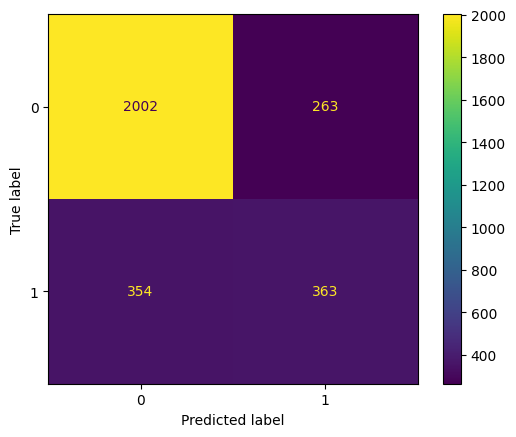

In [149]:
adb_tuned = AdaBoostClassifier(random_state=42, learning_rate=6, n_estimators=100)
adb_tuned.fit(X_train, y_train)
evaluation(adb_tuned, X_train, y_train, X_test, y_test)

## XGBoost

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2265
           1       0.68      0.38      0.48       717

    accuracy                           0.81      2982
   macro avg       0.75      0.66      0.68      2982
weighted avg       0.79      0.81      0.79      2982



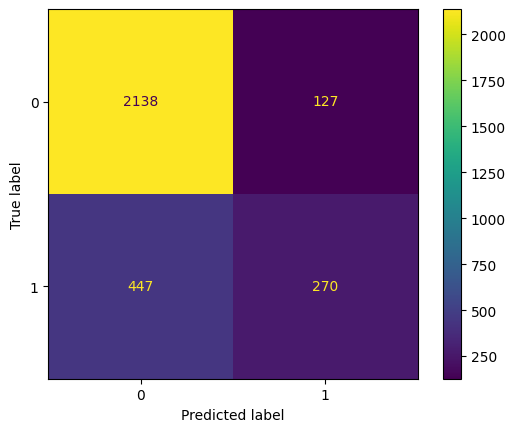

In [150]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)
evaluation(xgb, X_train, y_train, X_test, y_test)

In [ ]:
# param_grid = {
#     'eta': [0.1, 0.3, 0.6],
#     'gamma': [0, 3],
#     'max_depth': [2, 6],
#     'subsample': [0.5, 0.7, 0.9],
#     'colsample_bytree': [0.5, 0.7, 0.9],
#     'reg_lambda': [1, 3],
#     'alpha': [0, 2],
#     'scale_pos_weight': [1, 1.2]
#     }

# GridSearch(X_train, y_train, param_grid, xgb)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC


estimators = [
    ("rf", RandomForestClassifier(n_estimators=500, max_features="log2", random_state=42)),
    (
        "gb",
        GradientBoostingClassifier(
            warm_start=True,
            tol=0.0001,
            n_iter_no_change=5,
            n_estimators=200,
            min_samples_split=4,
            min_samples_leaf=1,
            max_features=None,
            max_depth=3,
            learning_rate=0.015,
            criterion="friedman_mse",
        ),
    ),
    (
        "logit",
        LogisticRegression(
            solver="saga", C=0.1, penalty="l2", multi_class="multinomial", max_iter=2000
        ),
    ),
    (
        "svc",
        SVC(C=10, degree=2, gamma=0.01, kernel="rbf", probability=True),
    ),
    ("nb", BernoulliNB()),
    ("nc", NearestCentroid())
]

In [ ]:
from sklearn.model_selection import StratifiedKFold

clf =  StackingClassifier(
                estimators=estimators,
                final_estimator=AdaBoostClassifier(
                    DecisionTreeClassifier(max_depth=2),
                    learning_rate=0.05,
                ),
                passthrough=True,
                stack_method="auto",
                cv=StratifiedKFold(n_splits=5, shuffle=True),
                n_jobs=-1,
            )

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7F7DF1F6CA40, shuffle=True),
                   estimators=[('rf',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.015,
                                                           min_samples_split=4,
                                                           n_estimators=200,
                                                           n_iter_no_change=5,
                                                           warm_start=True)),
                               ('logit',
                                LogisticRegression(C=0.1, max_iter=2000,
                                                   multi_class='multinomial',
                                                   solver='saga')),
                               ('svc',
                                SVC(C=10, degree=2, gamma=0.01,
                                    probability=True)),
                               ('nb', BernoulliNB()),
                               ('nc', NearestCentroid())],
                   final_estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                      learning_rate=0.05),
                   n_jobs=-1, passthrough=True)

In [ ]:
evaluation(clf, X_train, y_train, X_test, y_test)

## Final Model

In [153]:
y_pred = rfc_tuned.predict(df_test)
y_pred = np.array(y_pred, dtype=bool)
row_id = np.arange(6599)
data = {'id':row_id, 'Made_Purchase':y_pred}
submission = pd.DataFrame(data=data)
submission.to_csv('submission.csv', index=False)